Wstęp - zaimportowanie biblioteki do analizy i podanie ścieżek do plików

In [17]:
!pip install -i https://test.pypi.org/simple/ bradpitlib==0.0.1
w19 = "./data/2019/20200214_Wojewodztwa_za_2019.xlsx"
w20 = "./data/2020/20210211_Województwa_za_2020.xlsx"
p19 = "./data/2019/20200214_Powiaty_za_2019.xlsx"
p20 = "./data/2020/20210211_Powiaty_za_2020.xlsx"
m19 = "./data/2019/20200214_Miasta_NPP_za_2019.xlsx"
m20 = "./data/2020/20210215_Miasta_NPP_2_za_2020.xlsx"
g19 = "./data/2019/20200214_Gminy_za_2019.xlsx"
g20 = "./data/2020/20210215_Gminy_2_za_2020.xlsx"
# dane demograficzne dla JST
d_w = "./data/ludnosc/tabela02.xls"
d_p = "./data/ludnosc/tabela05.xls"
d_g = "./data/ludnosc/tabela12.xls"

# przy wizualizacji były przez zmianę typu kolumny
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://test.pypi.org/simple/

You should consider upgrading via the 'd:\users\magda\desktop\wdi\venv\scripts\python.exe -m pip install --upgrade pip' command.


Część I - porównanie dochodu każdej JST

In [18]:
from bradpitlib import compare_income
from bradpitlib import visualize

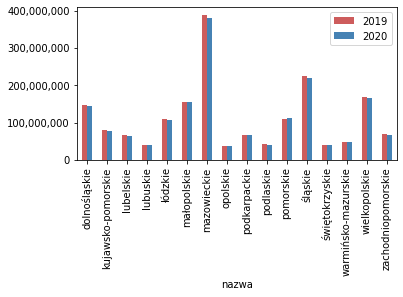

In [19]:
# dla województw
woj = compare_income(w19, w20)
visualize(woj, "2019", "2020", hist=True)

     kod        2019        2020           nazwa   województwo powiat
0  0201-  21984822.0  21276533.0   bolesławiecki  dolnośląskie      -
1  0202-  21906718.0  21328692.0  dzierżoniowski  dolnośląskie      -
2  0203-  30347660.0  28916309.0       głogowski  dolnośląskie      -
3  0204-   5784270.0   5682116.0        górowski  dolnośląskie      -
4  0205-  10550026.0  10450783.0        jaworski  dolnośląskie      -


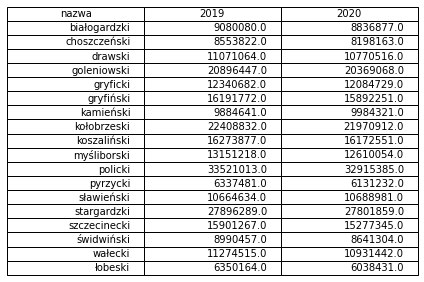

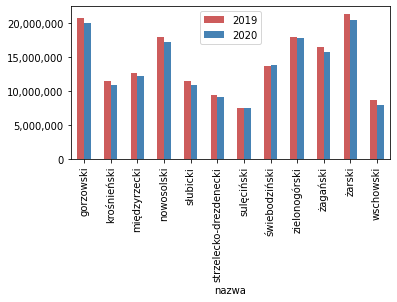

In [20]:
# dla powiatów
pow = compare_income(p19, p20)
print(pow.head()) # wszystkie powiaty
visualize(pow, "2019", "2020", "zachodniopomorskie") # tabela wybranych powiatów
visualize(pow, "2019", "2020", "lubuskie", hist=True) # histogram wybranych powiatów

In [21]:
from bradpitlib import drop_double_names

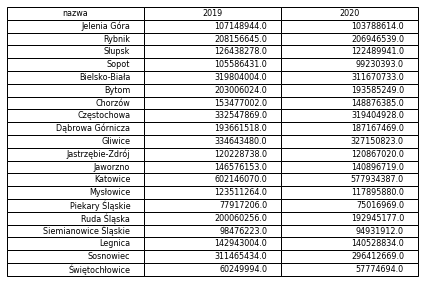

In [22]:
# dla miast na prawach powiatu
raw_mnpp = compare_income(m19, m20)
mnpp = drop_double_names(raw_mnpp, True) # bo zdublowane nazwy
visualize(mnpp.head(20), "2019", "2020")

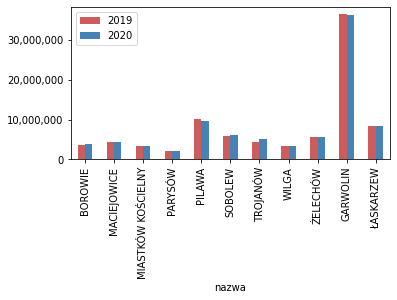

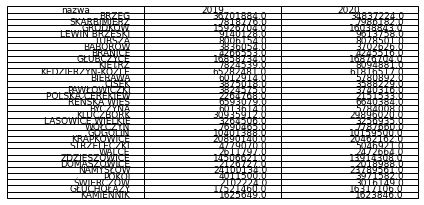

In [23]:
# dla gmin
raw_gm = compare_income(g19, g20)
gm = drop_double_names(raw_gm)
visualize(gm, "2019", "2020", powi="garwoliński", hist=True) # gminy dla danego powiatu
visualize(gm, "2019", "2020", woje="opolskie") # gminy dla województwa

Część II - obliczenie wariancji dla województw i powiatów

In [24]:
from bradpitlib import full_param

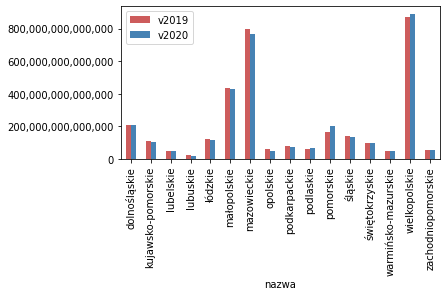

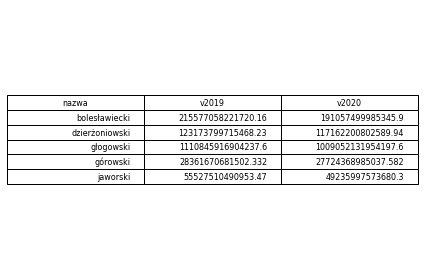

In [25]:
woj = compare_income(w19, w20)
pow = compare_income(p19, p20)
gm = compare_income(g19, g20)

woj_v = full_param("var", woj, pow)
visualize(woj_v, "v2019", "v2020", hist=True) # wariancja dla województw (w podległych powiatach)
pow_v = full_param("var", woj, pow, gm, True)
visualize(pow_v.head(5), "v2019", "v2020") # wariancja dla pierwszych 5-ciu powiatów (w gminach)

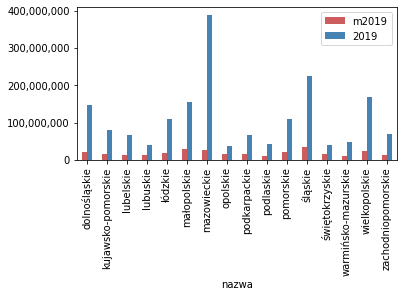

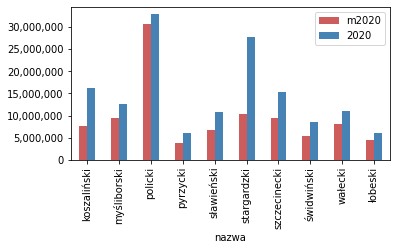

In [26]:
woj_m = full_param("mean", woj, pow)
visualize(woj_m, "m2019", "2019", hist=True)
# na niebiesko dochód województwa, na czerwono podległych powiatów
pow_m = full_param("mean", woj, pow, gm, True)
visualize(pow_m.iloc[304:,:], "m2020", "2020", hist=True) #dla 10 ostatnich powiatów

Część III - średni dochód opodatkowany dla kolejnych JST (liczymy go jako cały dochód z podatku PIT zebrany w danej JST podzielony przez liczbę mieszkańców, która płaci podatki, czyli osoby w wieku produkcyjnym i poprodukcyjnym (zakładam że to 85% społeczeństwa -> z danych GUS; zatem nie jest to dochód per capita)

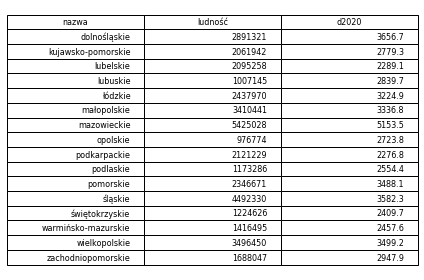

In [27]:
# w województwach
from bradpitlib import ppl_income_w
p1 = ppl_income_w(woj, d_w)
visualize(p1, "ludność", "d2020")

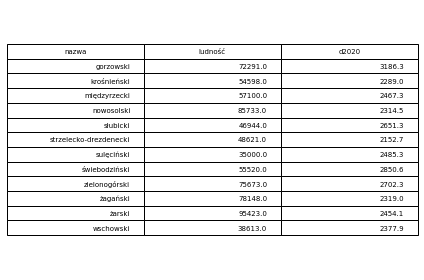

In [28]:
# w powiatach
from bradpitlib import ppl_income_p
p2 = ppl_income_p(pow, d_p)
visualize(p2.loc[pow["województwo"] == "lubuskie"], "ludność", "d2020") # tylko z województwa lubuskiego

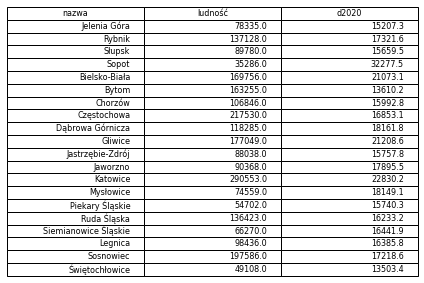

In [29]:
# w miastach na prawach powiatu
p3 = ppl_income_p(mnpp, d_p)
visualize(p3.head(20), "ludność", "d2020")

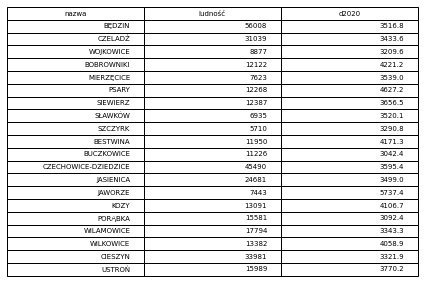

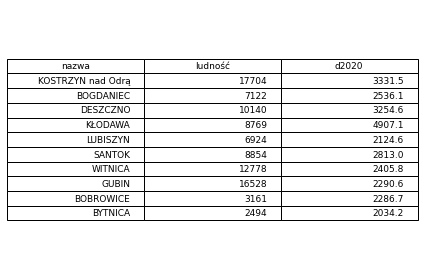

In [30]:
# w gminach
from bradpitlib import ppl_income_g
p4 = ppl_income_g(gm, d_g, "śląskie")
p5 = ppl_income_g(gm, d_g, "lubuskie")
visualize(p4.head(20), "ludność", "d2020")
visualize(p5.head(10), "ludność", "d2020")